In [1]:
import matplotlib
matplotlib.use('TkAgg')
#matplotlib.use('Qt5Agg')
import imageio
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal
import numpy as np
import smallest_enclosing_circle as sec

https://nube.df.uba.ar/index.php/s/4m7rJFYCcPbT9XK#pdfviewer

## Actividad 1.1
### (a)
Obtener las dimensiones de los objetos de la imagen “vil_metal.png”. Tratar de determinar lacalibración pixel/mm a partir de la regla ubicada en la parte inferior usando alguna(s) de las he-rramientas repasadas en clase, como binarización, filtros detectores de bordes, etc. Con estacalibración, obtener el diámetro de las monedas. 
Pensar estos puntos para la presentación: 

◦Cuál es el diámetro (cómo asegurar que el segmento elegido es el que pasa por el centro)?

◦Qué pasa con la sombra de la imagen?

◦Qué incerteza se le puede asignar a esa determinación?La imagen también está en el paquete de las imágenes que se usaron durante la clase.

### Calibración Píxel/Milímetro

#### Visualizamos la imagen
Utilizamos el gradiente de rojos porque nos pareicio el mas apropiado

In [2]:
AA = imageio.imread('data/vil_metal.png')

In [3]:
colors = ['Red','Green','Blue']
image_dict = {k: np.array(AA[:,:,i])  for i,k in enumerate(colors)}

Text(0, 0.5, 'Pixeles[px]')

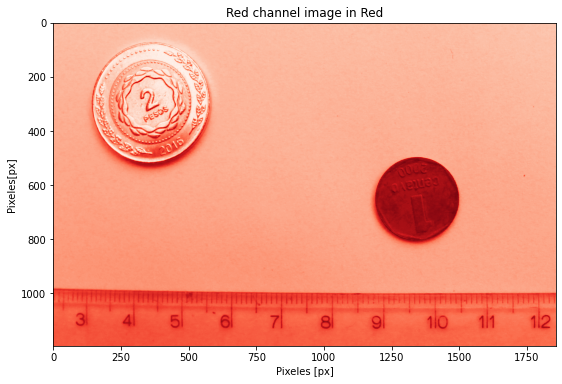

In [4]:
#probamos con rojo porque es donde hay mayor contraste entre el fondo de la regla y el milimetrado

%matplotlib inline

color = 'Red'
A = image_dict[color]
plt.figure(figsize = (9, 7.5))
plt.imshow(A, cmap=plt.cm.Reds_r)
plt.title(f'{color} channel image in {color}')
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')

#### Filtro de Sobel
Aplicamos el filtro de Sobel para quedarnos con los bordes de la imagen

In [5]:
#Utilizamos el operador Sobel
s_x = [[1, 2, 1],[0, 0, 0],[-1, -2, -1]]
s_y = np.transpose(s_x)

In [6]:
#Calculo la convolucion
x_conv = signal.convolve2d(A, s_x)
y_conv = signal.convolve2d(A, s_y)
R = np.sqrt(x_conv**2 + y_conv**2)

Text(0.5, 1.0, 'Imagen luego del filtro de Sobel')

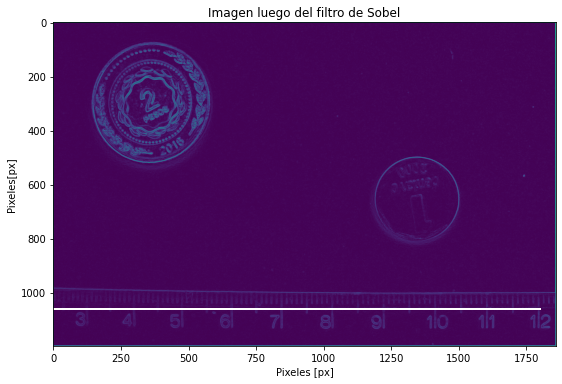

In [7]:
#cgrafica dicha convolución
%matplotlib inline
plt.figure(figsize = (9, 7.5))
plt.plot([1,1800], [1060,1060], 'white', lw=2)
plt.imshow(R)
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')
plt.title(f'Imagen luego del filtro de Sobel')
#noto que necesita que se rote

Text(0.5, 1.0, 'Imagen rotada luego del filtro de Sobel')

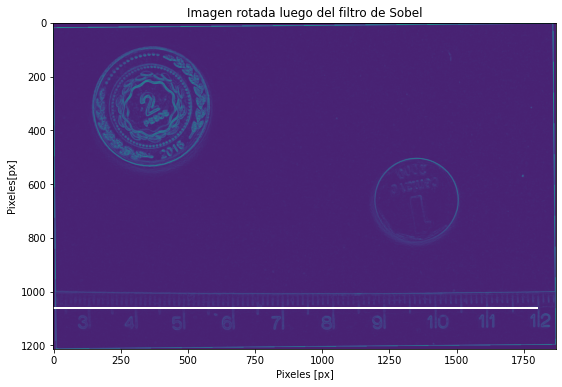

In [8]:
#roto 0.5 grados
%matplotlib inline
R2 = ndimage.rotate(R, 0.5)
#se grafica la imagen modificada
plt.figure(figsize = (9, 7.5))
plt.plot([1,1800], [1060,1060], 'white', lw=2)
plt.imshow(R2)
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')
plt.title(f'Imagen rotada luego del filtro de Sobel')

Text(0.5, 1.0, 'Perfil de Intensidades de la seccion de la regla')

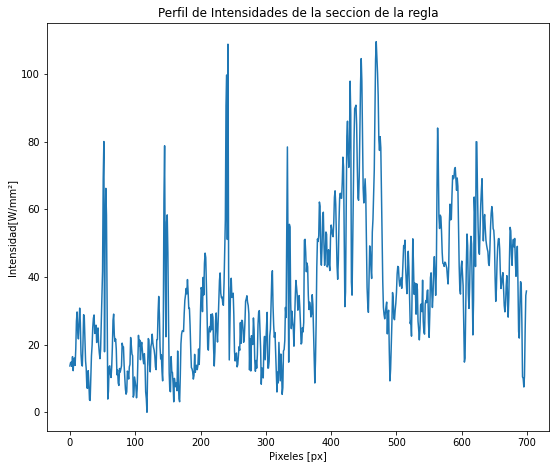

In [9]:
perf2 = R2[1060, 800:1500]
plt.figure(figsize = (9, 7.5))
plt.plot(perf2)
plt.xlabel('Pixeles [px]')
plt.ylabel('Intensidad[W/mm²]')
plt.title(f'Perfil de Intensidades de la seccion de la regla')

Graficamos el perfil de la imagen orignal a ver si se diferencian mejor las lineas

Text(0.5, 1.0, 'Perfil de Intensidades de la seccion de la regla')

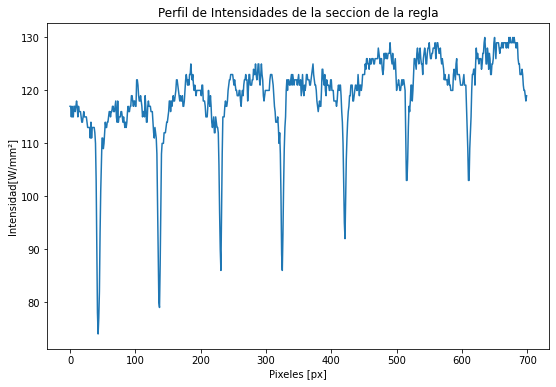

In [10]:
%matplotlib qt
perf = A[1060, 800:1500]
plt.figure(figsize = (7, 6))
plt.plot(perf)
x = np.array(plt.ginput(7))[:,0]

%matplotlib inline
perf = A[1060, 800:1500]
plt.figure(figsize = (9, 6))
plt.plot(perf)
plt.xlabel('Pixeles [px]')
plt.ylabel('Intensidad[W/mm²]')
plt.title(f'Perfil de Intensidades de la seccion de la regla')

In [11]:
%matplotlib qt
perf = A[1060, 800:1500]
plt.figure(figsize = (9, 6))
plt.plot(perf)
plt.xlabel('Pixeles [px]')
plt.ylabel('Intensidad[W/mm²]')
plt.title(f'Perfil de Intensidades de la seccion de la regla')

Text(0.5, 1.0, 'Perfil de Intensidades de la seccion de la regla')

In [18]:
diff_x = np.diff(x)

# Promedio de los valores
escala = np.mean( diff_x )/5 #son los valores de pixeles cada 5mm
escala_error = np.std(  diff_x )

print(f'Escala: ( {escala}  ± {escala_error}  ) px/mm')

Escala: ( 18.908071600623437  ± 0.7751007141425423  ) px/mm


#### Binarización
Binarizamos la imagen para cambiar de escala de Píxeles a Milímetros

Text(0.5, 1.0, 'Imagen en Milímetros')

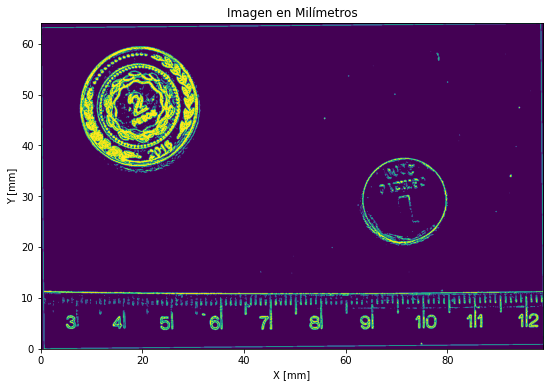

In [16]:
%matplotlib inline
#Seleccionamos los índices donde img_rotada tiene un valor mayor a 60
indices = (R2 > 50)

# Creamos una imagen del mismo tamaño pero vacía y la rellenamos con los pixeles que pasan el umbral
img_bin = np.zeros( R2.shape )
img_bin[indices] = 1
eje_y = np.arange(  R2.shape[0] ) / escala
eje_x = np.arange(  R2.shape[1] ) / escala
plt.figure(figsize = (9, 7.5)) 
plt.imshow(  img_bin, extent=[ eje_x.min(), eje_x.max(), eje_y.min(), eje_y.max()]  )
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.title(f"Imagen en Milímetros")


### Diámetro de las monedas

Ahora que ya tenemos la escala, podemos calcular los diámetros con la imagen que mayor contraste tenga entre el fondo y las monedas. Utilizamos el canal azul y la rotamos lo mismo que la original así calculamos la distancia en la misma base.

Text(0, 0.5, 'Pixeles[px]')

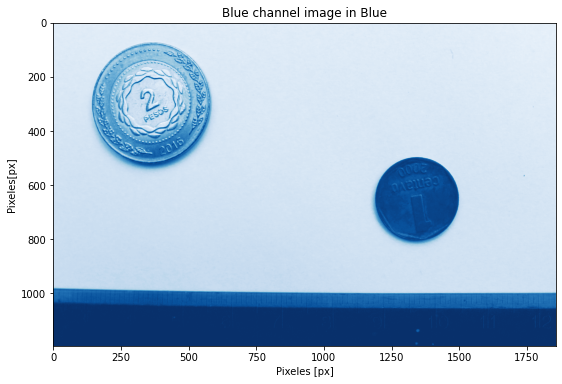

In [23]:
%matplotlib inline

color2 = 'Blue'
A2 = image_dict[color2]
plt.figure(figsize = (9, 7.5))
plt.imshow(A2, cmap=plt.cm.Blues_r)
plt.title(f'{color2} channel image in {color2}')
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')

In [25]:
#Calculo la convolucion
x_conv2 = signal.convolve2d(A2, s_x)
y_conv2 = signal.convolve2d(A2, s_y)
R2 = np.sqrt(x_conv2**2 + y_conv2**2)
R2 = ndimage.rotate(R2, 0.5)

Text(0, 0.5, 'Pixeles[px]')

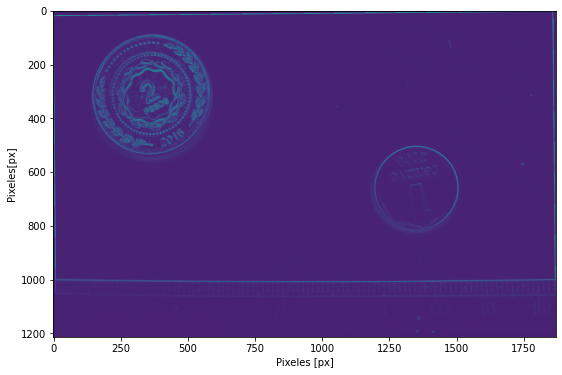

In [26]:
%matplotlib inline
plt.figure(figsize = (9, 7.5))
plt.imshow(R2)
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')

In [18]:
#binarizo la imagen y elijo 10 puntos del contorno de la moneda de 2 pesos
%matplotlib qt
R3=(R2>35); # elijo un umbral de binarización
B3b=R3.astype(float); # vuelvo a  convertir la matriz a punto flotante
fig, ax = plt.subplots()
ax.imshow(B3b) 
puntos = np.array(plt.ginput(3))

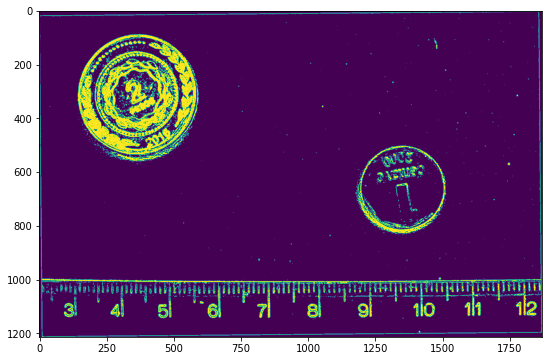

In [22]:
%matplotlib inline
R3=(R2>35); # elijo un umbral de binarización
B3b=R3.astype(float); # vuelvo a  convertir la matriz a punto flotante
fig, ax = plt.subplots(figsize = (9, 7.5))

ax.imshow(B3b)

Utilizamos la implementacion de Nayuki$^{[1]}$ para resolver el problema del círculo envolvente mínimo$^{[2]}$.
Para calcular la propagación del error instrumental (se indica a mano los puntos del círculo), utilizamos la librería uncertainties.

[1] https://www.nayuki.io/res/smallest-enclosing-circle/
[2] https://es.wikipedia.org/wiki/Problema_del_c%C3%ADrculo_m%C3%ADnimo

In [20]:
import smallest_enclosing_circle as sec #algoritmo para caluclar el minimo circulo
err_instrumental = 0.5 #error al insertar los puntos manualmente

#para calcular la propacion del error del algoritmo
x_center, y_center, radio = sec.make_circle(puntos)

from uncertainties import ufloat
from uncertainties.umath import *  
escala_con_error = ufloat(escala, escala_error)
radio_con_error = ufloat(radio, err_instrumental) #no pudimos calcular la 
print(f'El diametro de la moneda de 2 pesos es {radio_con_error*2/escala_con_error}mm')
escala_con_error

El diametro de la moneda de 2 pesos es 23.9+/-1.4mm


18.919911012235822+/-1.0686135826127998

Realizamos el mismo proceso para la otra moneda

In [20]:
%matplotlib qt
R4=(R2>35); # elijo un umbral de binarización
B3a=R4.astype(float); # vuelvo a  convertir la matriz a punto flotante
fig, ax = plt.subplots()
ax.imshow(B3a) 
puntos1 = np.array(plt.ginput(3))

In [21]:
x_center1, y_center1, radio1 = sec.make_circle(puntos1)
radio1_con_error = ufloat(radio1, err_instrumental) #no pudimos calcular la 
print(f'El diametro de la moneda de 1 centavo es {radio1_con_error*2/escala_con_error}mm')

El diametro de la moneda de 1 centavo es 16.3+/-0.9mm


### Método alternativo

Vamos a aplicar un metodo alternativo para calcular el diámetro de la moneda. Creamos perfiles horizontales que barren una seccion estratégica de la imagen: la moneda y sus proximidades. Asi se van detectan los pixeles con un valor de intensidad mayor a cierto umbral y se guardan los más próximos a los bordes de la sección. La distancia entre los pixeles más lejanos entre sí es la que corresponde al diametro. Este metodo contempla los valores generados por sombras. 

In [22]:
def calculcar_diametro(matriz,umbral,moneda):
    R5 = (matriz>umbral)
    B4b=R5.astype(float)
    val=[] #Lista con los valores
    for i in range(600):
        if moneda == 2:
            perfil=R5[40+i,100:700]
        if moneda == 1:
            perfil=R5[450+i,1150:1580]
        val_min = 1000 #Elijo una cota superior
        val_max = 0    #Elijo una cota inferior
        for j in range(len(perfil)):
            c=len(perfil)-1-j # j cuenta desde el primer pixel y c cuenta desde el ultimo pixel
            if perfil[c]==True and j<val_min: #Se va a quedar con el primer valor que de 1
                val_min=j
            if perfil[c]==True and c>val_max: #Se va a quedar con el ultimo valor que de 1
                val_max=c
        if val_max-val_min==-1000:
            val.append(0)
        else:
            val.append(val_max - val_min) #Agrega el valor a la lista

    m = max(val)
    diam = m/escala
    diam_err = m/(escala**2)*escala_error
    return diam, diam_err

In [23]:
diam2, diam2_err = calculcar_diametro(R2,37,2)
diam1, diam1_err = calculcar_diametro(R2,90,1)

print(f'El diametro de la moneda de dos pesos es {diam2} ± {diam2_err} mm')
print(f'El diametro de la moneda de un centavo es {diam1} ± {diam1_err} mm')

El diametro de la moneda de dos pesos es 23.83732141807278 ± 1.3463533429933068 mm
El diametro de la moneda de un centavo es 22.67452525133752 ± 1.280677570164365 mm


### (b) 
Tomar una o dos fotos con celular o cámara e intentar algún tipo de procesamiento de la ima-gen: por ejemplo eliminar una estructura periódica de una imagen (mosquitero, reja, etc), mediralgún tamaño típico a partir de una grilla de calibración, contar objetos (lentejas, porotos, ho-jas), filtrar por promediado, detectar bordes, etc.

In [3]:
import cv2
import numpy as np

img = cv2.imread('WhatsApp Image 2021-04-13 at 11.44.00 AM.jpeg', -1)
planosRGB = cv2.split(img)

result_planes = []
result_norm_planes = []
for plane in planosRGB:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)
    
result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

cv2.imwrite('shadows_out.jpeg', result)
cv2.imwrite('shadows_out_norm.jpeg', result_norm)

[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 4 3 2]
 [0 0 0 ... 4 4 3]
 [0 0 0 ... 4 4 3]]
[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 4 3 2]
 [0 0 0 ... 4 4 3]
 [0 0 0 ... 4 4 3]]
[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 4 3 2]
 [0 0 0 ... 4 4 3]
 [0 0 0 ... 4 4 3]]


True

### (b) alternativo

In [12]:
patron = imageio.imread('data/patron.jfif')
colors = ['Red','Green','Blue']
patron_dict = {k: np.array(patron[:,:,i])  for i,k in enumerate(colors)}

In [13]:
#Ploteo la imagen original y en sus 3 distintos canales

%matplotlib qt

plt.figure(figsize = (7, 6))
plt.imshow(patron, cmap=plt.cm.Reds_r)
plt.title(f'Original Image')
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')

Text(0, 0.5, 'Pixeles[px]')

In [14]:
%matplotlib qt
f, axs = plt.subplots(1, 3, figsize=(10,15))
axs = axs.flatten()
for i,color in enumerate(colors):
    axs[i].imshow(patron_dict[color], cmap=plt.cm.Greys)
    axs[i].set_title(f'{color} channel image in Greys')
    axs[i].set_xlabel('Pixeles [px]')
    axs[i].set_ylabel('Pixeles[px]')

Vamos a sacarle los patrones pintados de un color rojo "intenso". Para ellos realizamos un filtrado de intensidades en el canal rojo.

In [16]:
#Calculo la convolucion
patron_rojo = patron_dict['Red']

##x_conv_patron = signal.convolve2d(patron_rojo, s_x)
##y_conv_patron = signal.convolve2d(patron_rojo, s_y)
#R_patron = np.sqrt(x_conv_patron**2 + y_conv_patron**2)

%matplotlib inline
#Seleccionamos los índices donde img_rotada tiene un valor mayor a
indices = (patron_rojo>254)

# Creamos una imagen del mismo tamaño pero vacía y la rellenamos con los pixeles que pasan el umbral
img_bin = np.zeros( patron_rojo.shape )
img_bin[indices] = 1

patron[:,:,0] = np.multiply(img_bin,patron_rojo) #multiplicamos pixel por pixel
%matplotlib qt
plt.figure(figsize = (7,6)) 
plt.imshow(patron)
plt.title(f'Processed Image')
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')

Text(0, 0.5, 'Pixeles[px]')

In [88]:
patron

Array([[[250,   0,   0],
        [248,   0,   0],
        [245,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [241,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [244,   0,   0],
        [243,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [251,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [250,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [254,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

## Actividad 1.2
### (a)
Calcular cuánto se estira un tornillo de acero de 6 mm de diámetro y 25 mm de largo si se lecuelga una masa de 100 kg de su extremo inferior (ver la figura). copia comprimida de la imagen "vil_metal.png"

Usar la ley de Hooke,ΔL=LF/EA, dondeL es la longitud en reposo del material, F lafuerza   ejercida,  E  el   módulo   de   Young   y  A  la   sección   (área   transversal)   de   la   pieza(E≈20.6×1010N/m2). 

### (b)
Si el límite elástico del acero es de 5.5×108N/m2cuál es la máxima carga que se puedeaplicar sobre ese tornillo, antes de que se empiece a deformar en forma permanente? (ojo,tiene las mismas unidades que el módulo de Young pero no es!) Para calcular esta cargamáxima, este límite elástico define una carga máxima por unidad de área (la sección de lapieza):   a   una   barra   de  1m2  de   sección   le   puedo   aplicar   una   tensión   máxima   de5.5×108N, que es un montón (pero claro, la barra tiene 1m×1mde sección!!)